<a href="https://colab.research.google.com/github/fasthill/AI_advaned_ksa/blob/main/deeplearning/notebooks/chap%2016-1%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%9D%B8%EC%8B%9D%20CNN-%EC%8B%A4%EC%8A%B5%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import imdb, fashion_mnist, mnist

In [29]:
import numpy as np
import sys, os, shutil
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [7]:
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [24]:
X_train_3 = X_train.reshape(X_train.shape+(1,)) / 255
X_test_3 = X_test.reshape(X_test.shape+(1,)) / 255

In [30]:
MODEL_DIR = './model_image/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
else:
    shutil.rmtree(MODEL_DIR)
    os.mkdir(MODEL_DIR)

model_path = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

In [31]:
checkpoint_cb = ModelCheckpoint(filepath=model_path, save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, verbose=1, restore_best_weights=True)

In [44]:
model = Sequential()
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [46]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(X_train_3, Y_train, epochs=50, batch_size=200,
          validation_split=0.2, 
          callbacks=[early_stopping_cb, checkpoint_cb],
          verbose=1)

Epoch 1/50
240/240 [==============================] - 28s 112ms/step - loss: 0.5514 - accuracy: 0.8281 - val_loss: 0.1296 - val_accuracy: 0.9629
Epoch 2/50
240/240 [==============================] - 27s 112ms/step - loss: 0.1641 - accuracy: 0.9515 - val_loss: 0.0746 - val_accuracy: 0.9787
Epoch 3/50
240/240 [==============================] - 27s 111ms/step - loss: 0.1140 - accuracy: 0.9661 - val_loss: 0.0638 - val_accuracy: 0.9805
Epoch 4/50
240/240 [==============================] - 27s 111ms/step - loss: 0.0937 - accuracy: 0.9717 - val_loss: 0.0540 - val_accuracy: 0.9838
Epoch 5/50
240/240 [==============================] - 27s 111ms/step - loss: 0.0819 - accuracy: 0.9754 - val_loss: 0.0485 - val_accuracy: 0.9855
Epoch 6/50
240/240 [==============================] - 27s 111ms/step - loss: 0.0717 - accuracy: 0.9783 - val_loss: 0.0448 - val_accuracy: 0.9868
Epoch 7/50
240/240 [==============================] - 27s 111ms/step - loss: 0.0651 - accuracy: 0.9802 - val_loss: 0.0474 - val_ac

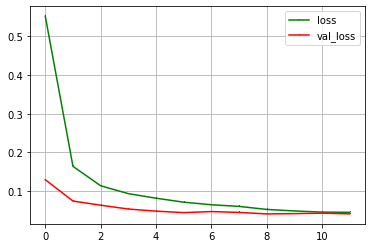

In [52]:
plt.plot(history.history['loss'], marker=',', c='g', label='loss')
plt.plot(history.history['val_loss'], marker=',', c='r', label='val_loss')
plt.grid()
plt.legend()
plt.show()

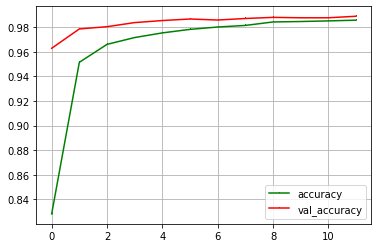

In [53]:
plt.plot(history.history['accuracy'], marker=',', c='g', label='accuracy')
plt.plot(history.history['val_accuracy'], marker=',', c='r', label='val_accuracy')
plt.grid()
plt.legend()
plt.show()

In [54]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 6.3993 - accuracy: 0.9894


In [55]:
for x in model.predict(X_test):
    print(np.argmax(x), end=", ")

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 5

In [56]:
for x in Y_test:
    print(x, end=", ")

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 5

In [57]:
# compare predicted values with real values
sum_eq = 0
for i, x in enumerate(model.predict(X_test)):
    if np.argmax(x) == Y_test[i] :
        sum_eq += 1
    else:
        print('order: {}, predict: {}, value: {}'.format(i, np.argmax(x), Y_test[i]))
print(sum_eq/len(X_test))

order: 321, predict: 7, value: 2
order: 340, predict: 3, value: 5
order: 495, predict: 6, value: 8
order: 582, predict: 2, value: 8
order: 659, predict: 1, value: 2
order: 717, predict: 6, value: 0
order: 740, predict: 9, value: 4
order: 947, predict: 9, value: 8
order: 1014, predict: 5, value: 6
order: 1039, predict: 3, value: 7
order: 1226, predict: 2, value: 7
order: 1232, predict: 4, value: 9
order: 1247, predict: 5, value: 9
order: 1299, predict: 7, value: 5
order: 1319, predict: 0, value: 8
order: 1393, predict: 3, value: 5
order: 1425, predict: 4, value: 8
order: 1522, predict: 9, value: 7
order: 1530, predict: 7, value: 8
order: 1621, predict: 6, value: 0
order: 1722, predict: 7, value: 2
order: 1790, predict: 8, value: 2
order: 1878, predict: 3, value: 8
order: 1901, predict: 4, value: 9
order: 2018, predict: 7, value: 1
order: 2035, predict: 3, value: 5
order: 2098, predict: 0, value: 2
order: 2109, predict: 7, value: 3
order: 2129, predict: 8, value: 9
order: 2130, predict: 

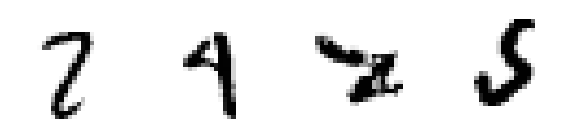

In [68]:
# 맞지 않은 글씨 (위 error 발생에서 임의 선택)
fig, axs = plt.subplots(1,4, figsize=(10,8))
idx = [321, 740, 4176, 9982]
for i in range(4):
  axs[i].imshow(X_test[idx[i]], cmap='Greys')
  axs[i].axis('off')

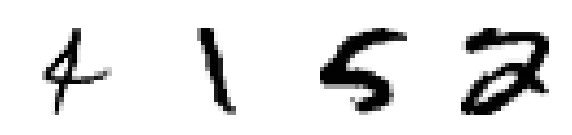

In [69]:
# 맞는 글씨 (임의 선택4)
fig, axs = plt.subplots(1,4, figsize=(10,8))
idx = [300, 700, 4177, 9980]
for i in range(4):
  axs[i].imshow(X_test[idx[i]], cmap='Greys')
  axs[i].axis('off')